# Describing our Question

**a) Specifying the Question**

To investigate if there is any similarity  between the mean number of blue cars returned from postcodes starting with "92" and the rest of paris postcodes.

To investigate this, our hypothesis will be:

1. Null hypothesis is that the mean of blue_cars returned in postcodes starting with "92" is greater than or equal to that of all the Paris postcodes.

2. Alternative hypothesis is that the mean of blue_cars returned in postcodes starting with "92" is less than that of all the Paris postcodes.

**b) Defining the Metric of success**

For this analysis to be considered successful, we shall either agree with the claim or reject the claim. The following areas must be covered:
1.   Describing the Question
2.   Data Cleaning.
3.   Exploratory Data analysis(Univariate Analysis, Bivariate Analysis)
4.   Use Appropriate Visualizations
5.   Hypothesis Testing

**c) Understanding the context**

We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim.

To accomplish this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the assumption.

**d)  Recording the Expereimental Design**

The following steps shall be followed:

*   Defining the Question
*   Reading the Data.
*   Exploring the Data.
*   Data Cleaning
*   Exploratory Data analysis (Performing Univariate and Bivariate Analysis)
*   Creating Visualizations.
*   Hypothesis Testing.
*  Summary

# Importing Our Libraries

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm
from scipy.stats import t
import math
from scipy.stats import ttest_ind
import statsmodels.api as sm

#Importing warning to avoid the warning that may appear
import warnings
warnings.filterwarnings('ignore') 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Loading our Dataset and Previewing 

In [2]:
#Reading our description file
#This will help us understand the columns and what they represent
desc=pd.read_excel('http://bit.ly/DSCoreAutolibDatasetGlossary')
desc

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [3]:
#reading the csv file and creating a dataset
url='http://bit.ly/DSCoreAutolibDataset'
df=pd.read_csv(url)
df.head()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [4]:
#Checking the tail
df.tail()

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0
16084,95880,6/19/2018,1370,1,weekday,2,2,2,1,0,0,0,0


# Exploring Our Dataset

In [5]:
#check the shape
df.shape
#Our dataset has 16085 rows and 13 columns

(16085, 13)

In [6]:
#checking the columns in our datasets and their datatypes
print(df.dtypes)

Postal code                int64
date                      object
n_daily_data_points        int64
dayOfWeek                  int64
day_type                  object
BlueCars_taken_sum         int64
BlueCars_returned_sum      int64
Utilib_taken_sum           int64
Utilib_returned_sum        int64
Utilib_14_taken_sum        int64
Utilib_14_returned_sum     int64
Slots_freed_sum            int64
Slots_taken_sum            int64
dtype: object


In [7]:
#Learning about the dataset by getting its info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [8]:
#Checking the statistical summaries of our dataset
df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


# Cleaning Our data

In [9]:
#removing syntax errors in column names
df.columns=df.columns.str.lower().str.replace(" ", "_")
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,utilib_taken_sum,utilib_returned_sum,utilib_14_taken_sum,utilib_14_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20


In [10]:
#Checking for null values
df.isnull().sum()
# Our dataset has no null values

postal_code               0
date                      0
n_daily_data_points       0
dayofweek                 0
day_type                  0
bluecars_taken_sum        0
bluecars_returned_sum     0
utilib_taken_sum          0
utilib_returned_sum       0
utilib_14_taken_sum       0
utilib_14_returned_sum    0
slots_freed_sum           0
slots_taken_sum           0
dtype: int64

In [11]:
#checking for duplicates
df.duplicated().sum()
#Our dataset has no duplicated data

0

In [12]:
df.columns

Index(['postal_code', 'date', 'n_daily_data_points', 'dayofweek', 'day_type',
       'bluecars_taken_sum', 'bluecars_returned_sum', 'utilib_taken_sum',
       'utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',
       'slots_freed_sum', 'slots_taken_sum'],
      dtype='object')

In [13]:
# Dropping unnecessary columns
# Our focus on this study are the bluecars  meaning  we have no need for utilib cars, hence we shall drop utilib columns
df.drop(['utilib_taken_sum','utilib_returned_sum', 'utilib_14_taken_sum', 'utilib_14_returned_sum',], axis = 1, inplace = True)
df.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,18,20


**Outliers**

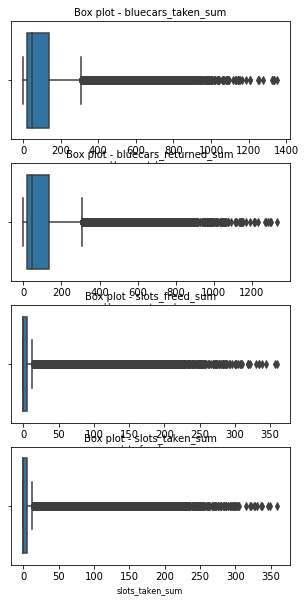

In [14]:
#checking for outliers
col_names = ['bluecars_taken_sum','bluecars_returned_sum', 'slots_freed_sum', 'slots_taken_sum']

fig, ax = plt.subplots(len(col_names), figsize=(5,10))
for i, col_val in enumerate(col_names):
    sns.boxplot(df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [15]:
#Find the range between the maximum and minimum value

maximum_value = df.bluecars_returned_sum.max()
minimum_value = df.bluecars_returned_sum.min()
col_range = maximum_value - minimum_value

print(col_range)

1332


In [16]:
# Check for outliers
num_col = df[col_names]
Q1 = num_col.quantile(0.25)
Q3 = num_col.quantile(0.75)
IQR = Q3 -Q1

# print out the rows with outliers
l_bound=(num_col < (Q1 - 1.5 * IQR))
u_bound=(num_col > (Q3 + 1.5 * IQR))

outliers = num_col[l_bound|u_bound].any(axis=1)
index = outliers[outliers.values == True].index
df[df.index.isin(index)].count()

postal_code              3343
date                     3343
n_daily_data_points      3343
dayofweek                3343
day_type                 3343
bluecars_taken_sum       3343
bluecars_returned_sum    3343
slots_freed_sum          3343
slots_taken_sum          3343
dtype: int64

The number of outliers is  beyond the range threshold. However it would result in an inconclusive analysis if the outliers are dropped since they can be viable entries.

# Exploratory Data Analysis

**Univariate Analysis**

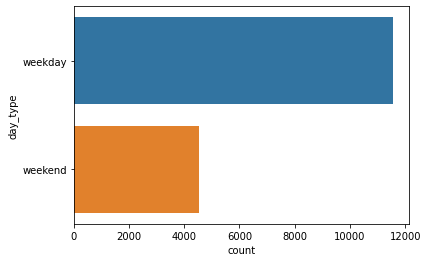

In [17]:
# Check the distribution of the cars usages in different day type(weekdays and weekends)
sns.countplot(y='day_type', data=df)

Weekdays had more data than the weekends. This implies that majority of the activity was conducted during the weekdays as the reason for using it our analysis. 

Histograph

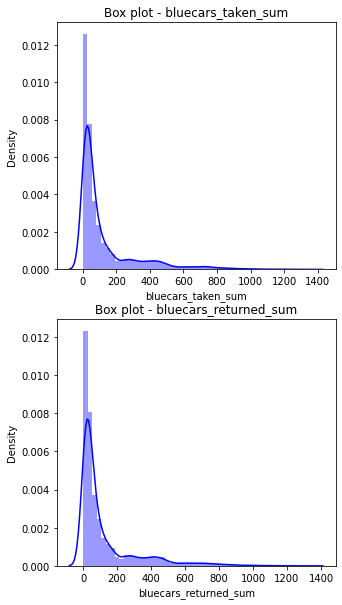

In [18]:
#Plot an histogrm to visulize the distribution of bluecars_returned_sum and bluecars_taken_sum
col_names = ['bluecars_taken_sum','bluecars_returned_sum']

fig, ax = plt.subplots(len(col_names), figsize=(5,10))
for i, col_val in enumerate(col_names):
    sns.distplot(df[col_val], ax=ax[i], kde=True, color='blue')
    ax[i].set_title('Box plot - {}'.format(col_val))
    ax[i].set_xlabel(col_val)
plt.show()


In [19]:
#getting the measures of central tendacy 
col_names=['slots_freed_sum', 'slots_taken_sum', 'bluecars_taken_sum','bluecars_returned_sum']
for i in col_names:
  print(i)
  print(f'mean: {df[i].mean()}')
  print(f'median: {df[i].median()}')
  print(f'mode: {df[i].mode()}')
  print(f'Standard Deviation: {df[i].std()}')
  print(f'Kurtosis: {df[i].kurt()}')
  print(f'Skewness: {df[i].skew()}')
  print('........')

slots_freed_sum
mean: 22.62903326080199
median: 0.0
mode: 0    0
dtype: int64
Standard Deviation: 52.12026333757879
Kurtosis: 6.454514382612528
Skewness: 2.5974057870090994
........
slots_taken_sum
mean: 22.629281939695367
median: 0.0
mode: 0    0
dtype: int64
Standard Deviation: 52.146029870452566
Kurtosis: 6.442553073772169
Skewness: 2.5969043474634987
........
bluecars_taken_sum
mean: 125.92695057506994
median: 46.0
mode: 0    12
dtype: int64
Standard Deviation: 185.42657876727893
Kurtosis: 6.172692305510042
Skewness: 2.4063548974959086
........
bluecars_returned_sum
mean: 125.912713708424
median: 46.0
mode: 0    13
dtype: int64
Standard Deviation: 185.50153480148427
Kurtosis: 6.1862880957582345
Skewness: 2.412084978838923
........


In [20]:
#Visulizing the car usage in weekdays
#Begin by renaming the weekdays to names of the week
weekday = df[df['day_type']== 'weekday']
weekday['dayofweek'] = weekday.dayofweek.map({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday'})
weekday.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
0,75001,1/1/2018,1440,Monday,weekday,110,103,22,20
1,75001,1/2/2018,1438,Tuesday,weekday,98,94,23,22
2,75001,1/3/2018,1439,Wednesday,weekday,138,139,27,27
3,75001,1/4/2018,1320,Thursday,weekday,104,104,25,21
4,75001,1/5/2018,1440,Friday,weekday,114,117,18,20


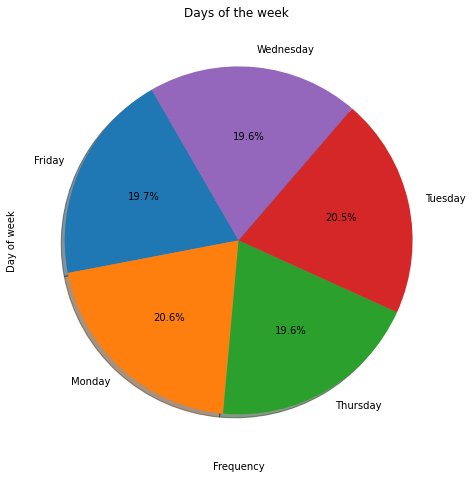

In [21]:
#plotting a pie graph
weekday_df= weekday.groupby(['dayofweek']).count().reset_index()
x = weekday_df['bluecars_returned_sum'] 
labels = weekday_df['dayofweek']
plt.pie(x, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 120)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("Days of the week ")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

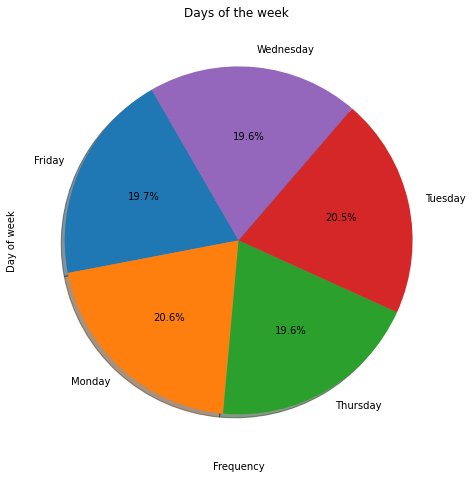

In [22]:
#plotting a pie graph
weekday_df= weekday.groupby(['dayofweek']).count().reset_index()
x = weekday_df['bluecars_taken_sum'] 
labels = weekday_df['dayofweek']
plt.pie(x, labels = labels, autopct = '%1.1f%%', shadow = True, startangle = 120)
plt.ylabel("Day of week")
plt.xlabel('Frequency')
plt.title("Days of the week ")
fig = plt.gcf()
fig.set_size_inches(8,8)
plt.show()

In [23]:
df[(df['bluecars_taken_sum'] > 0 )& (df['bluecars_returned_sum'] > 0)].groupby('day_type')['day_type'].count().sort_values(ascending= False)

day_type
weekday    11481
weekend     4513
Name: day_type, dtype: int64

**Recommendation**

From our Univariate Analysis, we can conclude that there is more blue car usage during the weekdays than on weekend.The Bluecar taken and returned columns seem to have similar statistical bearing. Therefore, the company should ensure that resources are available and functioning during these days. 

**Bivarient Analysis**

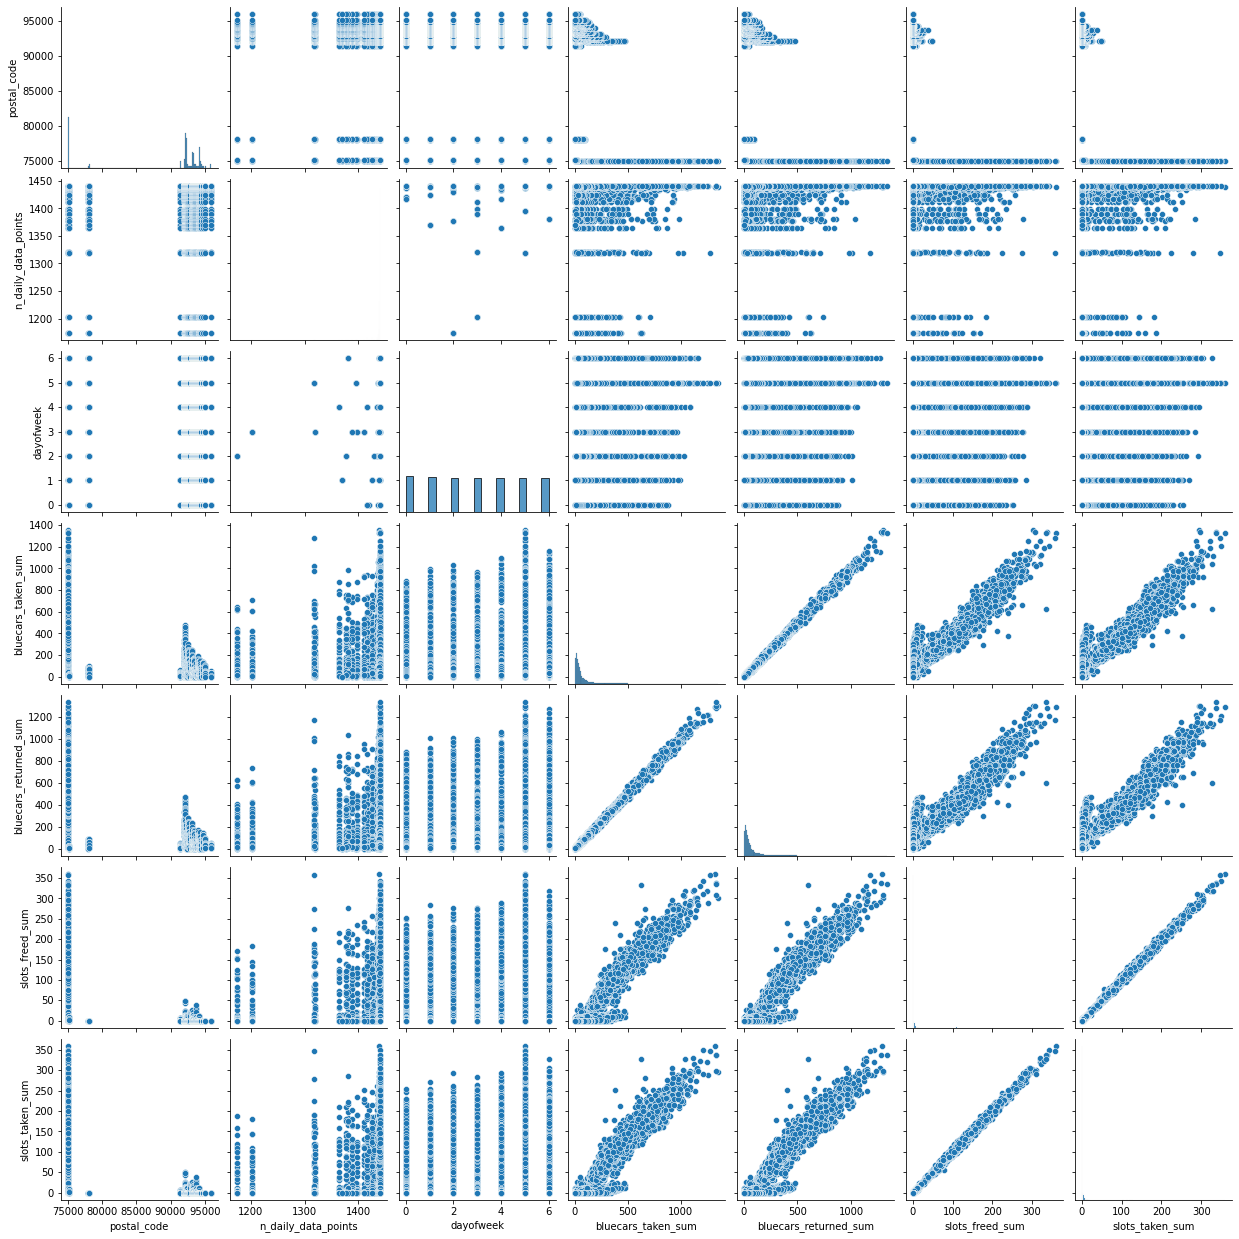

In [24]:
#Pairplots of our data
sns.pairplot(df)
plt.show()

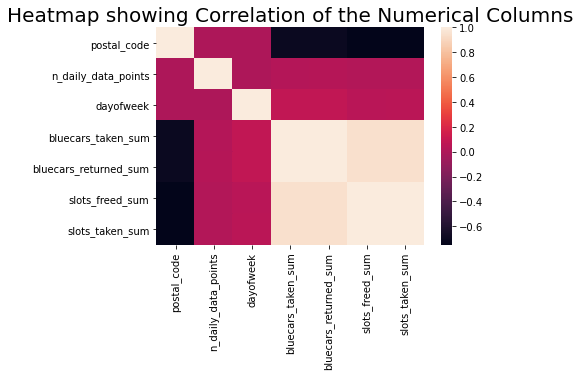

In [25]:
#Calculating the correction
corr = df.corr()
plt.figure()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
plt.title('Heatmap showing Correlation of the Numerical Columns', fontsize = 20)
plt.show()

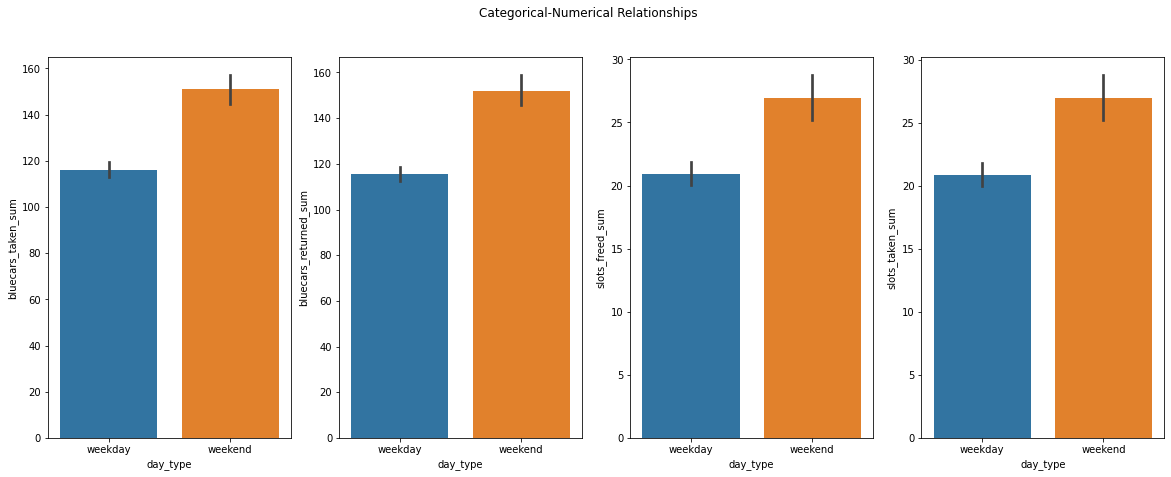

In [26]:
#Categorical aganist numeric relationship
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4, figsize=(20, 7))
fig.suptitle('Categorical-Numerical Relationships')
sns.barplot(x= df.day_type, y= df.bluecars_taken_sum, ax=ax1)
sns.barplot(x= df.day_type, y= df.bluecars_returned_sum, ax=ax2)
sns.barplot(x= df.day_type, y= df.slots_freed_sum, ax=ax3)
sns.barplot(x= df.day_type, y= df.slots_taken_sum, ax=ax4)
plt.show()
# Weekends seems to have more activity than weekdays, contraly to what we had seen before. 

**Conclusion and Recommendation**:
* Weekends have more activity than weekdays. The company can ensure that the more cars are available during the weekends.

* There is a positive correlation between bluecars taken and bluecars returned. This implyies there is a direct proportion on the bluecars taken and those returned.
* Its also evident that there is a positive correlation between slot freed and slot taken. This implies that there is a direct proportion between the slots freed and those taken.

# Hypothesis Testing



**Hypothesis testing Procedure:**

Step 1: Formulate the null hypothesis and the alternative hypothesis

Step 2: Identify a test statistic and significance level that can be used to assess the truth of the null hypothesis.

Step 3: Computing the test-statistic and P-value. 

Step 4: Analyze the results and either accept or reject the null hypothesis.

Step 5: Interpreting the Results

In [27]:
df['postal_code'].unique()

array([75001, 75002, 75003, 75004, 75005, 75006, 75007, 75008, 75009,
       75010, 75011, 75012, 75013, 75014, 75015, 75016, 75017, 75018,
       75019, 75020, 75112, 75116, 78000, 78140, 78150, 91330, 91370,
       91400, 92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160,
       92170, 92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260,
       92270, 92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360,
       92370, 92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700,
       92800, 93100, 93110, 93130, 93150, 93170, 93200, 93230, 93260,
       93300, 93310, 93350, 93360, 93370, 93390, 93400, 93440, 93500,
       93600, 93700, 93800, 94000, 94100, 94110, 94120, 94130, 94140,
       94150, 94160, 94220, 94230, 94300, 94340, 94410, 94450, 94500,
       94700, 94800, 95100, 95870, 95880])

In [28]:
#Selecting the desired population
#make a copy of our dataset
sample = df.copy(deep = True)
#convert the postal code dtype to be string
sample['postal_code'] = sample['postal_code'].astype(str)
#select only those codes starting with 92
sample = sample.loc[sample.postal_code.str.startswith('92')]
#convert the dtype back to int
sample.postal_code = sample.postal_code.astype(int)
#check the dtype
sample.postal_code.dtype

dtype('int64')

In [29]:
#checking the unique values
sample['postal_code'].unique()

array([92000, 92100, 92110, 92120, 92130, 92140, 92150, 92160, 92170,
       92190, 92200, 92210, 92220, 92230, 92240, 92250, 92260, 92270,
       92290, 92300, 92310, 92320, 92330, 92340, 92350, 92360, 92370,
       92380, 92390, 92400, 92410, 92420, 92500, 92600, 92700, 92800])

In [30]:
#getting the value count of each
sample['postal_code'].value_counts()

#Postal codes have either 147 to 156 rows. 

92410    156
92800    156
92100    156
92120    156
92140    156
92160    156
92200    156
92220    156
92240    156
92260    156
92300    156
92320    156
92380    156
92400    156
92500    156
92700    156
92600    156
92210    156
92230    156
92370    156
92350    156
92330    156
92310    156
92290    156
92270    156
92250    156
92000    156
92190    156
92170    156
92150    156
92130    156
92390    155
92420    155
92110    155
92360    153
92340    147
Name: postal_code, dtype: int64

In [31]:
#Check the shape of our sample
sample.shape

#Our target population has 5601 rows and 9 columns

(5601, 9)

In [32]:
#Since we are only intrested with the weekdays,
sample = sample[sample['day_type']== 'weekday']
sample.head()

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
4366,92000,1/1/2018,1440,0,weekday,119,133,0,0
4367,92000,1/2/2018,1438,1,weekday,150,121,0,0
4368,92000,1/3/2018,1439,2,weekday,153,155,0,0
4369,92000,1/4/2018,1320,3,weekday,139,133,0,0
4370,92000,1/5/2018,1440,4,weekday,140,142,0,0


In [33]:
#selecting our sample 
samp=sample.groupby('postal_code', group_keys=False).apply(lambda x: x.sample(30, random_state=10))
samp

,postal_code,date,n_daily_data_points,dayofweek,day_type,bluecars_taken_sum,bluecars_returned_sum,slots_freed_sum,slots_taken_sum
4509,92000,6/7/2018,1439,3,weekday,210,187,0,0
4493,92000,5/22/2018,1438,1,weekday,180,171,0,0
4470,92000,4/18/2018,1377,2,weekday,131,116,0,0
4433,92000,3/12/2018,1440,0,weekday,151,128,0,0
4440,92000,3/19/2018,1440,0,weekday,172,145,0,0
...,...,...,...,...,...,...,...,...,...
9893,92800,3/27/2018,1440,1,weekday,90,94,10,9
9947,92800,5/31/2018,1411,3,weekday,100,97,9,9
9814,92800,1/4/2018,1320,3,weekday,72,71,3,3
9939,92800,5/23/2018,1174,2,weekday,70,66,5,6


**Step 1. Formulating null and alternative hypothesis**

1. Null hypothesis is that the mean of blue_cars returned in postcodes starting with "92" is greater than or equal to that of all the Paris postcodes.

2. Alternative hypothesis is that the mean of blue_cars returned in postcodes starting with "92" is less than that of all the Paris postcodes.

**Step 2. Identifying test statistic and significant level**

We shall use the z -test in our analysis. This is because our sample has more than 30 value. 
We shall assume a 5% level of significant in our analysis

**Step 3. Compute test statistic and p value**

In [34]:
#Calculating the z -test
#Population mean
pop_mean=df['bluecars_returned_sum'].mean()
print('Population Mean:', pop_mean)
pop_dev=df['bluecars_returned_sum'].std()
print('Population satndard devation:', pop_dev)
samp_mean=samp['bluecars_returned_sum'].mean()
print('Sample mean:', samp_mean)
samp_dev=samp['bluecars_returned_sum'].std()
print('Sample Standard deviation:', samp_dev)

z_test = (samp_mean - pop_mean)/pop_dev
print("z score is:", z_test)

Population Mean: 125.912713708424
Population satndard devation: 185.50153480148427
Sample mean: 73.64537037037037
Sample Standard deviation: 72.78175366908393
z score is: -0.28176232285079406


In [35]:
#Calculating the p value
p_value = 1 - stats.norm.cdf(z_test)
p_value


0.6109371185721479

**Step 4. Analyze Results**

In [36]:
if p_value<0.05:
    print("Reject null hypothesis and Accept the alternative hypotheis")
else:
    print("Fail to reject the null hypothesis")

Fail to reject the null hypothesis


**Step 5. Interprete the Results**

The p value is greater than the alpha therefore, it is not statistically significant. 
This indicates strong evidence for the null hypothesis hence we fail to reject the null hypothesis and conclude that the mean blue cars returned  of postal codes starting with "92" is greater than or equal to the mean blue cars returned of all Paris postal codes. 


**Point Estimate**

In [37]:
#Our point estimate is the population mean
#Population mean
pop_mean=df['bluecars_returned_sum'].mean()
print('Population Mean:', pop_mean)

Population Mean: 125.912713708424


**Confidence Interval**

In [38]:
print(samp_mean)
#finding the sample size
size=samp.shape[0]
#calculating the standard error
std_error=samp_dev/np.sqrt(size)
#calculating confindence interval
stats.norm.interval(0.95, loc=samp_mean, scale=std_error)


73.64537037037037


(69.30468078923072, 77.98605995151003)

The confidence interval indicates that our sample mean should lie between 69.30 and 77.98 within a confidence level of 95%. This is true because our sample mean is 73.64537037037037

**Test Sensitivity**

In [39]:
# Effect of changing the sample size, using a sample size of 80 and a random_state of 30

sample_1 = df.copy(deep= True)
sample_1 = sample_1.groupby('postal_code', group_keys=False).apply(lambda x: x.sample(80, random_state=30))

#Calculating the z -test
#Population mean
pop_mean=df['bluecars_returned_sum'].mean()
print('Population Mean:', pop_mean)

pop_dev=df['bluecars_returned_sum'].std()
print('Population satndard devation:', pop_dev)

samp_1_mean=sample_1['bluecars_returned_sum'].mean()
print('Sample mean:', samp_1_mean)

samp_1_dev=sample_1['bluecars_returned_sum'].std()
print('Sample Standard deviation:', samp_1_dev)

z_test = (samp_1_mean - pop_mean)/pop_dev
print("z score is:", z_test)

#Calculating the p value
p_value = 1 - stats.norm.cdf(z_test)
print("p value is:", p_value)

if p_value<0.05:
    print("Reject null hypothesis and Accept the alternative hypotheis")
else:
    print("Fail to reject the null hypothesis")

Population Mean: 125.912713708424
Population satndard devation: 185.50153480148427
Sample mean: 126.72992788461538
Sample Standard deviation: 185.95183484912124
z score is: 0.004405430807167888
p value is: 0.4982424930725361
Fail to reject the null hypothesis


# Summary,and Conclusion  




From our analysis, the mean for the postal code starting with '92' was higher than the mean of all the postal codes. The z-score(-0.281) is less than the z-critical(1.625), as well as the p-value(0.61) is higher than alpha value(0.05) hence we failed to reject the null-hypothesis. We have also conducted a test sensitivity to determine the rigidity of the method. We  did this by changing the sample size to 80 and random state to 30 and the results still showed that there was no means greater. This means that the postal codes starting with '92' have a higher mean of the blue cars being returned daily.
